In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [61]:
F_TIM = 72000  # Гц
T_TIM = 1.0 / F_TIM  # Секунды

SPR = 2000
ALPHA = 2.0 * np.pi / SPR  # rad

targetLoops = 1
targetSteps = targetLoops * SPR

targetAcel = 0.9
targetDecl = 0.9
targetSpeed = 3.0  # rad/sec (1 rad/sec = 9.55 rpm)


def calc_speed(c_t):
    return (ALPHA / (c_t * T_TIM))

def calc_c(omega, n):
     return ( (np.sqrt(n + 1) - np.sqrt(n)) * np.sqrt(2.0 * ALPHA / omega) / T_TIM)

def generate_speed_profile(speed, acel, decel, steps):
    max_s_lim = int(speed ** 2 / (2.0 * ALPHA * acel))
    n1 = int(steps * decel / (acel + decel))
    n2 = int(n1 * acel / decel)
    
    if max_s_lim < n1:
        steps_to_acel = max_s_lim
        steps_to_decel = int(max_s_lim * acel / decel)
    else:
        steps_to_acel = n1
        steps_to_decel = n2
        
    steps_before_decel = steps - steps_to_decel
        
    x = np.linspace(0, steps, steps, endpoint=False)
    y = [0]
    
    print(f"C_0 is {calc_c(acel, 0)}")
    
    for step in range(1, steps):
        if step < steps_to_acel:
            c = calc_c(acel, step)
            s = calc_speed(c)
            y.append(s)
        elif step >= steps_to_acel and step < steps_before_decel:
            y.append(speed)
        else:
            c = calc_c(decel, steps - step)
            s = calc_speed(c)
            y.append(s)
        
    y[-1] = 0.0
    
    print(f"total steps = {steps}")
    print(f"Steps to accel = {steps_to_acel}")
    print(f"Steps to decel = {steps_to_decel}")
    print(f"Steps to freerun = {steps_before_decel - steps_to_acel}")
    print(f"Steps before decel = {steps_before_decel}")
    
    return x, y, steps_to_acel, steps_to_decel

C_0 is 6015.907859114401
total steps = 2000
Steps to accel = 1000
Steps to decel = 1000
Steps to freerun = 0
Steps before decel = 1000


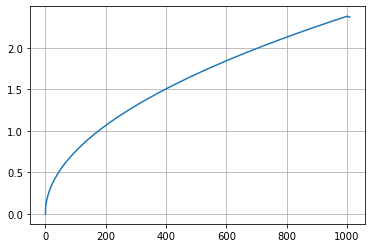

In [62]:
x, y, n1, n2 = generate_speed_profile(targetSpeed, targetAcel, targetDecl, targetSteps)
plt.plot(x[0:n1 + 10], y[0:n1 + 10])
plt.grid()
plt.show()

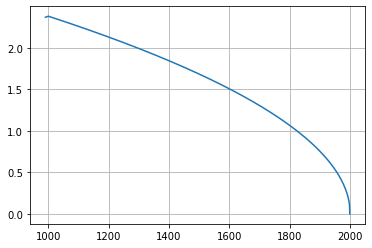

In [63]:
plt.plot(x[targetSteps - n2 -10:], y[targetSteps - n2 -10:])
plt.grid()
plt.show()